# generate a embed_task with repo 

prior to analysis run example1.py to generate the embeddings in terminal since large dataset can take a long time to run

```bash
python example1.py
```

No embeddings found, please run `generate_embeddings_for_repo` first


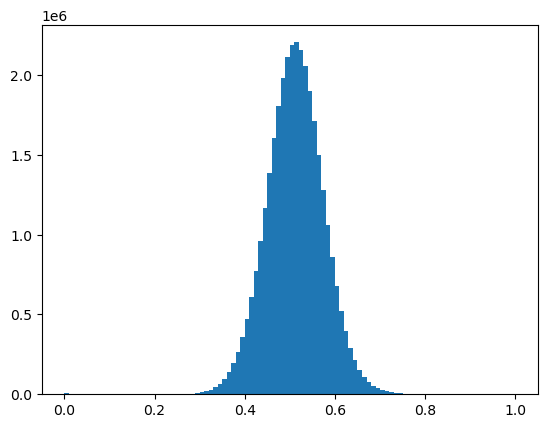

In [1]:
from embed_task import embed_task_with_repo

import pandas as pd
import random

df = pd.read_csv('/mnt/yangyijun/embeddingtools/data/ambossdf.csv')

trainlen = int(df.shape[0] * 0.8)
trainindex = random.sample(range(df.shape[0]), trainlen)
train = df.iloc[trainindex]
test = df.drop(trainindex)


embedder = embed_task_with_repo('bge-en', train,colname= 'string')
embedder.load_embeddings("embeddings_df.npy")
# embedder.generate_embeddings_for_repo(batch_size=200)
embedder.get_similarity_distribution(plot=True)

# embedder.save_embeddings("embeddings_df.npy")


# cluster with different method

In [3]:
# Example usage 5: Clustering
embedder.cluster(method='knn', n_clusters=20, random_state=123, colnameoflabel='test1')

df = pd.DataFrame(embedder.metadata[['string','test1','label']])
df.sort_values(by='test1', inplace=True)

# check distribution of the cluster with previous label

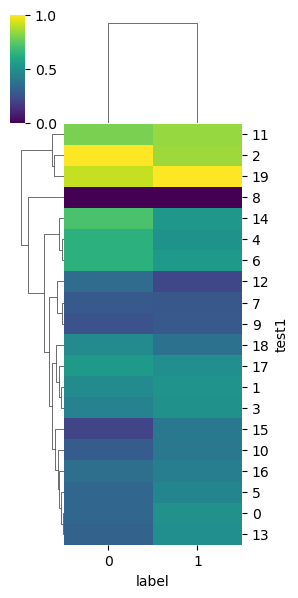

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
table = df.groupby(['test1','label']).size().unstack(fill_value=0)
sns.clustermap(table, cmap='viridis', figsize=(3, 6),standard_scale=1)